In [357]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
%matplotlib inline

In [358]:
stock='ITC.NS'
data=yf.download(stock,'2021-08-28','2023-08-25',interval='1h')

[*********************100%***********************]  1 of 1 completed


In [359]:
data['High-Low'] = data['High'] - data['Low']
data['High-PrevClose'] = abs(data['High'] - data['Close'].shift(1))
data['Low-PrevClose'] = abs(data['Low'] - data['Close'].shift(1))
data['TrueRange'] = data[['High-Low', 'High-PrevClose', 'Low-PrevClose']].max(axis=1)
data.drop(['High-Low', 'High-PrevClose', 'Low-PrevClose'], axis=1, inplace=True)

period = 14

data['ATR'] = data['TrueRange'].rolling(period).mean()
data.drop('TrueRange', axis=1, inplace=True)
data

,Open,High,Low,Close,Adj Close,Volume,ATR
Datetime,,,,,,,
2021-08-30 09:15:00+05:30,206.500000,206.850006,206.000000,206.449997,206.449997,0,NaN
2021-08-30 10:15:00+05:30,206.500000,206.600006,206.000000,206.199997,206.199997,1550591,NaN
2021-08-30 11:15:00+05:30,206.149994,206.750000,206.149994,206.649994,206.649994,1394109,NaN
2021-08-30 12:15:00+05:30,206.600006,207.699997,206.600006,207.600006,207.600006,2048929,NaN
2021-08-30 13:15:00+05:30,207.550003,207.899994,207.199997,207.350006,207.350006,1312119,NaN
...,...,...,...,...,...,...,...
2023-08-24 11:15:00+05:30,450.100006,451.600006,449.600006,451.149994,451.149994,890888,1.878568
2023-08-24 12:15:00+05:30,451.049988,451.399994,450.250000,450.750000,450.750000,716404,1.889282
2023-08-24 13:15:00+05:30,450.750000,451.200012,450.200012,450.350006,450.350006,896906,1.832140


In [360]:
data['Typical']=(data['High']+data['Low']+data['Close'])/3
data['Vwap'] = (data['Typical'] * data['Volume']).cumsum() / data['Volume'].cumsum()

data

,Open,High,Low,Close,Adj Close,Volume,ATR,Typical,Vwap
Datetime,,,,,,,,,
2021-08-30 09:15:00+05:30,206.500000,206.850006,206.000000,206.449997,206.449997,0,NaN,206.433334,NaN
2021-08-30 10:15:00+05:30,206.500000,206.600006,206.000000,206.199997,206.199997,1550591,NaN,206.266668,206.266668
2021-08-30 11:15:00+05:30,206.149994,206.750000,206.149994,206.649994,206.649994,1394109,NaN,206.516663,206.385023
2021-08-30 12:15:00+05:30,206.600006,207.699997,206.600006,207.600006,207.600006,2048929,NaN,207.300003,206.760447
2021-08-30 13:15:00+05:30,207.550003,207.899994,207.199997,207.350006,207.350006,1312119,NaN,207.483332,206.910867
...,...,...,...,...,...,...,...,...,...
2023-08-24 11:15:00+05:30,450.100006,451.600006,449.600006,451.149994,451.149994,890888,1.878568,450.783335,296.174664
2023-08-24 12:15:00+05:30,451.049988,451.399994,450.250000,450.750000,450.750000,716404,1.889282,450.799998,296.191913
2023-08-24 13:15:00+05:30,450.750000,451.200012,450.200012,450.350006,450.350006,896906,1.832140,450.583344,296.213473


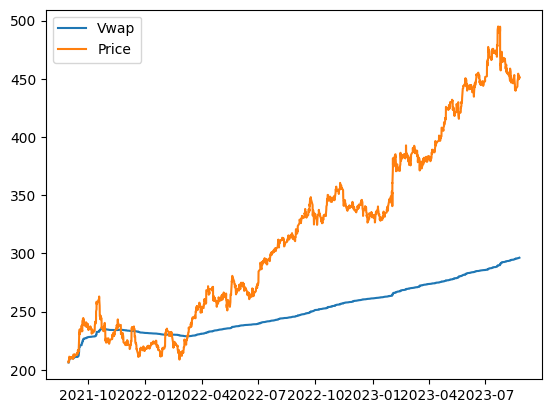

In [361]:
plt.plot(data['Vwap'],label='Vwap')
plt.plot(data['Typical'],label='Price')
plt.legend()

In [362]:
atr_multiplier = 1.2

data['UpperBand'] = data['Typical'] + atr_multiplier * data['ATR']
data['LowerBand'] = data['Typical'] - atr_multiplier * data['ATR']

In [363]:
buy_signals=[]
sell_signals=[]
signals=[]

status=''
for i in range(len(data)):
    if (data['Typical'][i] < data['LowerBand'][i] or data['Close'][i] < data['Vwap'][i]) and status != 'SELL':
        sell_signals.append(i)
        signals.append(('SELL'))
        status = 'SELL'
    elif (data['Typical'][i] > data['UpperBand'][i] or data['Close'][i] > data['Vwap'][i]) and status != 'BUY':
        buy_signals.append(i)
        signals.append(('BUY'))
        status = 'BUY'
    else:
        signals.append(('NONE'))

print(sell_signals)
print(buy_signals)
print(signals)

[1, 18, 27, 36, 264, 266, 272, 285, 386, 497, 742, 764, 770, 772, 779, 782, 791, 797]
[2, 21, 28, 42, 265, 271, 276, 356, 479, 741, 743, 769, 771, 774, 780, 786, 792, 912]
['NONE', 'SELL', 'BUY', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'SELL', 'NONE', 'NONE', 'BUY', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'SELL', 'BUY', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'SELL', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'BUY', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE',

In [364]:
investment=100000 #100k
number_of_stocks=investment//(data['Close'][0])
in_hand = investment - number_of_stocks * data['Close'][0]
returns=[]

for i in range(len(signals)):
    if signals[i][1]=='BUY':
        temp = in_hand // data['Close'][i]
        in_hand -= temp * data['Close'][i]
        combined_number_of_stocks += temp
    elif signals[i][1]=='SELL':
        in_hand += combined_number_of_stocks * data['Close'][i]
        combined_number_of_stocks = 0
    returns.append(in_hand+number_of_stocks*data['Close'][i])

print("The return on investing 100000 rupees is:",returns[-1])

combined_percentage_returns=format((((returns[-1])-(investment))/investment)*(100),".2f")
print("The percentage return in case of combined strategy is:",combined_percentage_returns,"%")

The return on investing 100000 rupees is: 218313.79852294922
The percentage return in case of combined strategy is: 118.31 %


In [365]:
pnl=[]
for i in range(len(returns)):
    pnl.append(((returns[i]-investment)/investment)*100)
pnl[-1]

118.31379852294921

In [366]:
sharpe=(np.mean(pnl)-0.03)/np.std(pnl)
sharpe

1.3860790557361327